Q: How much more likely is certain preexisting conditions/symptoms to be related to high mortality? 

In [1]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import os
# from sklearn import tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


In [2]:
df = pd.read_csv('test3.csv')

In [3]:
df

,ID,Country,Province/State,Study Pop Size (N),Positive/negative cases,Mean Age,AgeGroup_pediatrics,AgeGroup_youngAdult,AgeGroup_aging,Gender_Male,...,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Sore Throat/Stuffy Nose,Chills,Chest Pain,Loss of smell/taste,Disease Severity Asymptomatic,Mortality,Mortality_bin
0,1,China,Wuhan,191,Positive only,56,0,0,0,1,...,0.05,0.04,0.00,0.00,0.00,0.0,0.0,0.0,0.28,1
1,1,China,Wuhan,54,Positive only,69,0,0,1,1,...,0.04,0.06,0.00,0.00,0.00,0.0,0.0,0.0,1.00,1
2,1,China,Wuhan,137,Positive only,52,0,0,0,1,...,0.05,0.03,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0
3,2,China,Wuhan,199,Positive only,58,0,0,0,1,...,0.02,0.04,0.01,0.00,0.00,0.0,0.0,0.0,0.16,1
4,2,China,Wuhan,99,Positive only,59,0,0,0,1,...,0.04,0.09,0.02,0.00,0.00,0.0,0.0,0.0,0.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,199,China,Hubei,78,Positive only,64,0,0,0,1,...,0.03,0.03,0.00,0.00,0.00,0.0,0.0,0.0,0.13,1
1152,200,USA,New York,151,Positive only,56,0,0,0,1,...,0.20,0.09,0.00,0.11,0.15,0.0,0.0,0.0,0.15,1
1153,200,USA,New York,618,Positive only,63,0,0,0,0,...,0.25,0.22,0.00,0.08,0.19,0.0,0.0,0.0,0.13,1
1154,200,USA,New York,231,Positive only,62,0,0,0,1,...,0.21,0.10,0.00,0.08,0.16,0.0,0.0,0.0,0.31,1


In [4]:
my_list = df.columns.values.tolist()
my_list

['ID',
 'Country',
 'Province/State',
 'Study Pop Size (N)',
 'Positive/negative cases',
 'Mean Age',
 'AgeGroup_pediatrics',
 'AgeGroup_youngAdult',
 'AgeGroup_aging',
 'Gender_Male',
 'White or European',
 'African American',
 'Asian',
 'Hispanic or Latino',
 'Multiple ethnicities or other',
 'Smoking history',
 'Hypertension',
 'Diabetes',
 'Cardiovascular Disease (incl. CAD)',
 'Chronic obstructive lung (COPD)',
 'Cancer (Any)',
 'Liver Disease (any)',
 'Cerebrovascular Disease',
 'Chronic kidney/renal disease',
 'Other',
 'Fever (temperature ≥37·3°C)',
 'Respiratory rate > 24 breaths per min',
 'Cough',
 'Shortness of Breath (dyspnoea)',
 'Headache',
 'Sputum (/Expectoration)',
 'Myalgia (Muscle Pain)',
 'Fatigue',
 'Upper air-way congestion',
 'Diarrhoea',
 'Nausea or Vomiting',
 'Loss of Appetite/Anorexia',
 'Sore Throat/Stuffy Nose',
 'Chills',
 'Chest Pain',
 'Loss of smell/taste',
 'Disease Severity Asymptomatic',
 'Mortality',
 'Mortality_bin']

In [5]:
column_names = ['Mean Age','Gender_Male','Smoking history', 'Hypertension', 'Diabetes', 'Cardiovascular Disease (incl. CAD)',
                'Chronic obstructive lung (COPD)', 'Cancer (Any)', 'Liver Disease (any)', 'Cerebrovascular Disease',
                'Chronic kidney/renal disease', 'Other', 'Fever (temperature ≥37·3°C)', 'Respiratory rate > 24 breaths per min',
                'Cough', 'Shortness of Breath (dyspnoea)', 'Headache', 'Sputum (/Expectoration)', 'Myalgia (Muscle Pain)',
                'Fatigue', 'Upper air-way congestion', 'Diarrhoea', 'Nausea or Vomiting', 'Loss of Appetite/Anorexia',
                'Sore Throat/Stuffy Nose', 'Chills', 'Chest Pain', 'Loss of smell/taste', 'Disease Severity Asymptomatic',
                'Mortality_bin']

new_df = pd.DataFrame(df,columns=column_names)
new_df

,Mean Age,Gender_Male,Smoking history,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,...,Upper air-way congestion,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Sore Throat/Stuffy Nose,Chills,Chest Pain,Loss of smell/taste,Disease Severity Asymptomatic,Mortality_bin
0,56,1,0.06,0.30,0.19,0.08,0.03,0.02,0.00,0.00,...,0.0,0.05,0.04,0.00,0.00,0.00,0.0,0.0,0.0,1
1,69,1,0.09,0.48,0.31,0.24,0.07,0.00,0.00,0.00,...,0.0,0.04,0.06,0.00,0.00,0.00,0.0,0.0,0.0,1
2,52,1,0.04,0.23,0.14,0.01,0.01,0.07,0.00,0.00,...,0.0,0.05,0.03,0.00,0.00,0.00,0.0,0.0,0.0,0
3,58,1,0.00,0.00,0.12,0.00,0.00,0.03,0.00,0.07,...,0.0,0.02,0.04,0.01,0.00,0.00,0.0,0.0,0.0,1
4,59,1,0.00,0.00,0.10,0.00,0.00,0.05,0.00,0.05,...,0.0,0.04,0.09,0.02,0.00,0.00,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,64,1,0.00,0.38,0.21,0.03,0.00,0.00,0.00,0.00,...,0.0,0.03,0.03,0.00,0.00,0.00,0.0,0.0,0.0,1
1152,56,1,0.21,0.50,0.26,0.11,0.07,0.03,0.01,0.00,...,0.0,0.20,0.09,0.00,0.11,0.15,0.0,0.0,0.0,1
1153,63,0,0.23,0.59,0.38,0.14,0.07,0.08,0.02,0.00,...,0.0,0.25,0.22,0.00,0.08,0.19,0.0,0.0,0.0,1
1154,62,1,0.24,0.68,0.43,0.13,0.06,0.06,0.02,0.00,...,0.0,0.21,0.10,0.00,0.08,0.16,0.0,0.0,0.0,1


In [6]:
data = new_df.drop("Mortality_bin", axis=1)
feature_names = data.columns
target=new_df['Mortality_bin']
target_names=['not_risk','risk']

In [7]:
target_names

['not_risk', 'risk']

In [8]:
######try this on last df which is factors instead of new_df
###use this as well
#####https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [9]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

In [10]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[230   0]
 [ 56   3]]
Normalized confusion matrix
[[1.   0.  ]
 [0.95 0.05]]


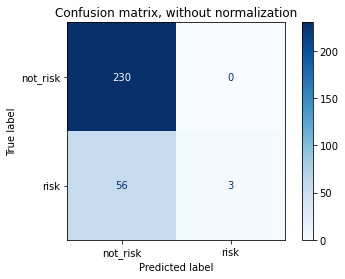

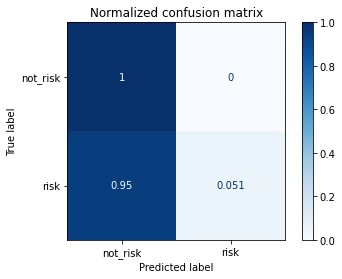

In [11]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [12]:
#end of confusion matrix

In [13]:
# from sklearn.metrics import classification_report
# print(classification_report (y_test, predictions, target_names = ['blue','red']))

In [14]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)  
clf.score(X_test, y_test)

1.0

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [16]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)
# too messy. need to split up underlying conditions vs symptoms 

[(0.17355997409315066, 'Diabetes'),
 (0.08267552033131852, 'Mean Age'),
 (0.07988178290680295, 'Hypertension'),
 (0.07512223968072487, 'Chronic kidney/renal disease'),
 (0.06779508596152947, 'Chronic obstructive lung (COPD)'),
 (0.06344068438662649, 'Cardiovascular Disease (incl. CAD)'),
 (0.0519272930850945, 'Shortness of Breath (dyspnoea)'),
 (0.047805411938021514, 'Cancer (Any)'),
 (0.04109940829192027, 'Fever (temperature ≥37·3°C)'),
 (0.04096335942345306, 'Cerebrovascular Disease'),
 (0.03727865892878517, 'Respiratory rate > 24 breaths per min'),
 (0.03051273146936817, 'Diarrhoea'),
 (0.028846675662765275, 'Fatigue'),
 (0.028588639524217314, 'Cough'),
 (0.02586618183370966, 'Myalgia (Muscle Pain)'),
 (0.01728505765795118, 'Other'),
 (0.014234213195081486, 'Nausea or Vomiting'),
 (0.013377084750218675, 'Sputum (/Expectoration)'),
 (0.013362146772805807, 'Liver Disease (any)'),
 (0.013241727198992087, 'Smoking history'),
 (0.012167861806252095, 'Sore Throat/Stuffy Nose'),
 (0.012159

In [17]:


column_names = ['Mean Age','Gender_Male','Smoking history', 'Hypertension', 'Diabetes', 'Cardiovascular Disease (incl. CAD)',
                'Chronic obstructive lung (COPD)', 'Cancer (Any)', 'Liver Disease (any)', 'Cerebrovascular Disease',
                'Chronic kidney/renal disease', 'Other','Mortality_bin']

risk_df = pd.DataFrame(new_df,columns=column_names)
risk_df

,Mean Age,Gender_Male,Smoking history,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Mortality_bin
0,56,1,0.06,0.30,0.19,0.08,0.03,0.02,0.00,0.00,0.02,0.12,1
1,69,1,0.09,0.48,0.31,0.24,0.07,0.00,0.00,0.00,0.04,0.20,1
2,52,1,0.04,0.23,0.14,0.01,0.01,0.07,0.00,0.00,0.00,0.08,0
3,58,1,0.00,0.00,0.12,0.00,0.00,0.03,0.00,0.07,0.00,0.00,1
4,59,1,0.00,0.00,0.10,0.00,0.00,0.05,0.00,0.05,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,64,1,0.00,0.38,0.21,0.03,0.00,0.00,0.00,0.00,0.00,0.00,1
1152,56,1,0.21,0.50,0.26,0.11,0.07,0.03,0.01,0.00,0.08,0.17,1
1153,63,0,0.23,0.59,0.38,0.14,0.07,0.08,0.02,0.00,0.16,0.10,1
1154,62,1,0.24,0.68,0.43,0.13,0.06,0.06,0.02,0.00,0.12,0.13,1


In [18]:
data = risk_df.drop("Mortality_bin", axis=1)
feature_names = data.columns
target=risk_df['Mortality_bin']
target_names=['risk','not_risk']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)



In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)  
clf.score(X_test, y_test)

0.986159169550173

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.986159169550173

In [21]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)
# Is comparable to high risk preexisting conditions on cdc website
# DM, age, HTN, CVD, COPD, Cancer/immunocompromised are main contributors to mortality 

[(0.23334570533056817, 'Diabetes'),
 (0.13636179792694508, 'Mean Age'),
 (0.13063938025836308, 'Hypertension'),
 (0.10074982456269346, 'Cardiovascular Disease (incl. CAD)'),
 (0.0919301069328901, 'Chronic obstructive lung (COPD)'),
 (0.07914931538869406, 'Cancer (Any)'),
 (0.07904366856122982, 'Chronic kidney/renal disease'),
 (0.04713455015390902, 'Cerebrovascular Disease'),
 (0.02722316086025834, 'Other'),
 (0.02717999115485437, 'Smoking history'),
 (0.024032395271832468, 'Gender_Male'),
 (0.02321010359776212, 'Liver Disease (any)')]

In [22]:
column_names = ['Mean Age','Gender_Male','Fever (temperature ≥37·3°C)', 'Respiratory rate > 24 breaths per min',
                'Cough', 'Shortness of Breath (dyspnoea)', 'Headache', 'Sputum (/Expectoration)', 'Myalgia (Muscle Pain)',
                'Fatigue', 'Upper air-way congestion', 'Diarrhoea', 'Nausea or Vomiting', 'Loss of Appetite/Anorexia',
                'Sore Throat/Stuffy Nose', 'Chills', 'Chest Pain', 'Loss of smell/taste', 'Disease Severity Asymptomatic','Mortality_bin']

symptoms_df = pd.DataFrame(new_df,columns=column_names)
symptoms_df
    

,Mean Age,Gender_Male,Fever (temperature ≥37·3°C),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Upper air-way congestion,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Sore Throat/Stuffy Nose,Chills,Chest Pain,Loss of smell/taste,Disease Severity Asymptomatic,Mortality_bin
0,56,1,0.94,0.29,0.79,0.00,0.00,0.23,0.15,0.23,0.0,0.05,0.04,0.00,0.00,0.00,0.0,0.0,0.0,1
1,69,1,0.94,0.63,0.72,0.00,0.00,0.26,0.15,0.28,0.0,0.04,0.06,0.00,0.00,0.00,0.0,0.0,0.0,1
2,52,1,0.94,0.16,0.82,0.00,0.00,0.22,0.15,0.21,0.0,0.05,0.03,0.00,0.00,0.00,0.0,0.0,0.0,0
3,58,1,0.91,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.02,0.04,0.01,0.00,0.00,0.0,0.0,0.0,1
4,59,1,0.90,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.04,0.09,0.02,0.00,0.00,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,64,1,0.40,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.03,0.03,0.00,0.00,0.00,0.0,0.0,0.0,1
1152,56,1,0.74,0.00,0.77,0.54,0.14,0.06,0.00,0.00,0.0,0.20,0.09,0.00,0.11,0.15,0.0,0.0,0.0,1
1153,63,0,0.72,0.00,0.73,0.61,0.10,0.09,0.00,0.00,0.0,0.25,0.22,0.00,0.08,0.19,0.0,0.0,0.0,1
1154,62,1,0.73,0.00,0.72,0.74,0.06,0.06,0.00,0.00,0.0,0.21,0.10,0.00,0.08,0.16,0.0,0.0,0.0,1


In [23]:
data = symptoms_df.drop("Mortality_bin", axis=1)
feature_names = data.columns
target=symptoms_df['Mortality_bin']
target_names=['risk','not_risk']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

In [24]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)  
clf.score(X_test, y_test)

0.986159169550173

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.986159169550173

In [26]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)
#Age, SOB, Fever, cough, diarrhea, tachypnea are main contributors to mortality rate 

[(0.2694623635016072, 'Mean Age'),
 (0.1374042239582275, 'Shortness of Breath (dyspnoea)'),
 (0.12096980227124049, 'Fever (temperature ≥37·3°C)'),
 (0.07508852470956308, 'Cough'),
 (0.06530684643009532, 'Diarrhoea'),
 (0.055585990626597526, 'Respiratory rate > 24 breaths per min'),
 (0.05451676943691488, 'Fatigue'),
 (0.03743264044390509, 'Sputum (/Expectoration)'),
 (0.03511269003733094, 'Myalgia (Muscle Pain)'),
 (0.03015149915933461, 'Nausea or Vomiting'),
 (0.029577509660506096, 'Sore Throat/Stuffy Nose'),
 (0.027703050668618494, 'Headache'),
 (0.020830728993570812, 'Chest Pain'),
 (0.01650967449622641, 'Gender_Male'),
 (0.01165392201247374, 'Loss of Appetite/Anorexia'),
 (0.007912263840971668, 'Chills'),
 (0.0024393935719469054, 'Upper air-way congestion'),
 (0.0021750641382114566, 'Disease Severity Asymptomatic'),
 (0.00016704204265761144, 'Loss of smell/taste')]

In [27]:
column_names = ['Mean Age', 'Hypertension', 'Diabetes', 'Cardiovascular Disease (incl. CAD)',
                'Chronic obstructive lung (COPD)', 'Cancer (Any)', 
                'Chronic kidney/renal disease', 'Fever (temperature ≥37·3°C)', 'Respiratory rate > 24 breaths per min',
                'Cough', 'Shortness of Breath (dyspnoea)', 
                'Mortality_bin']
factors = pd.DataFrame(new_df,columns=column_names)
factors


,Mean Age,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Mortality_bin
0,56,0.30,0.19,0.08,0.03,0.02,0.02,0.94,0.29,0.79,0.00,1
1,69,0.48,0.31,0.24,0.07,0.00,0.04,0.94,0.63,0.72,0.00,1
2,52,0.23,0.14,0.01,0.01,0.07,0.00,0.94,0.16,0.82,0.00,0
3,58,0.00,0.12,0.00,0.00,0.03,0.00,0.91,0.19,0.00,0.00,1
4,59,0.00,0.10,0.00,0.00,0.05,0.00,0.90,0.21,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1151,64,0.38,0.21,0.03,0.00,0.00,0.00,0.40,0.14,0.00,0.00,1
1152,56,0.50,0.26,0.11,0.07,0.03,0.08,0.74,0.00,0.77,0.54,1
1153,63,0.59,0.38,0.14,0.07,0.08,0.16,0.72,0.00,0.73,0.61,1
1154,62,0.68,0.43,0.13,0.06,0.06,0.12,0.73,0.00,0.72,0.74,1


In [28]:
X = factors.drop('Mortality_bin', axis=1)
y = factors['Mortality_bin']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=500)
classifier


LogisticRegression(max_iter=500)

In [30]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [31]:
print(f"Training Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8546712802768166


In [32]:
predictions = classifier.predict(X_test)
result=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(25)
result

,Prediction,Actual
972,0,0
202,0,0
661,1,0
1049,0,0
953,1,1
927,0,0
571,1,1
81,0,0
220,0,0
705,0,0


In [33]:
from sklearn.metrics import classification_report
print(classification_report (y_test, predictions, target_names = ['blue','red']))

              precision    recall  f1-score   support

        blue       0.89      0.93      0.91       230
         red       0.67      0.56      0.61        59

    accuracy                           0.85       289
   macro avg       0.78      0.74      0.76       289
weighted avg       0.85      0.85      0.85       289



In [34]:
result.to_csv('LRresult.csv')

In [35]:
factors

,Mean Age,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Mortality_bin
0,56,0.30,0.19,0.08,0.03,0.02,0.02,0.94,0.29,0.79,0.00,1
1,69,0.48,0.31,0.24,0.07,0.00,0.04,0.94,0.63,0.72,0.00,1
2,52,0.23,0.14,0.01,0.01,0.07,0.00,0.94,0.16,0.82,0.00,0
3,58,0.00,0.12,0.00,0.00,0.03,0.00,0.91,0.19,0.00,0.00,1
4,59,0.00,0.10,0.00,0.00,0.05,0.00,0.90,0.21,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1151,64,0.38,0.21,0.03,0.00,0.00,0.00,0.40,0.14,0.00,0.00,1
1152,56,0.50,0.26,0.11,0.07,0.03,0.08,0.74,0.00,0.77,0.54,1
1153,63,0.59,0.38,0.14,0.07,0.08,0.16,0.72,0.00,0.73,0.61,1
1154,62,0.68,0.43,0.13,0.06,0.06,0.12,0.73,0.00,0.72,0.74,1


In [36]:
new_patient = [25,1,.25,0,0,.80,0,0,0,1,0]


In [37]:
data = np.array([new_data]) 
predictions = classifier.predict(data)
predictions

NameError: name 'new_data' is not defined